In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
results_file = '../../write/pbmc3k.h5ad'  # the file that will store the analysis results

In [37]:
adata = sc.read_10x_mtx(
    '../GSE239626/MTX',
    var_names='gene_symbols',
    gex_only=False, 
    cache=True)

In [43]:
adata = adata[:, adata.var['feature_types'] == 'Antibody Capture']

In [44]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [45]:
adata

AnnData object with n_obs × n_vars = 72317 × 35
    var: 'gene_ids', 'feature_types'

In [46]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/nicolapitzalis/anaconda3/envs/chl/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [47]:
sc.pp.log1p(adata)

In [48]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [49]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/nicolapitzalis/anaconda3/envs/chl/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [50]:
adata = adata[:, adata.var.highly_variable]

In [51]:
sc.tl.pca(adata, svd_solver='arpack')

/Users/nicolapitzalis/anaconda3/envs/chl/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


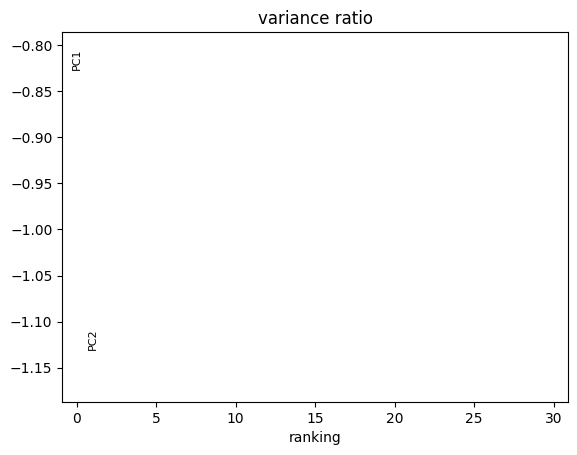

In [52]:
sc.pl.pca_variance_ratio(adata, log=True)

In [53]:
pca_dims = adata.varm['PCs'].shape[1]

In [54]:
adata.obsm['X_pca'].shape

(72317, 2)

In [55]:
adata.varm['PCs'].shape

(3, 2)

In [56]:
for pca_dim in range(pca_dims):
    for n_neighbors in range(2, 20)
        sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=pca_dim)
        sc.tl.umap(adata)
        sc.tl.leiden(adata)

SyntaxError: invalid syntax (3070117750.py, line 2)

In [58]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=2)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/Users/nicolapitzalis/anaconda3/envs/chl/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


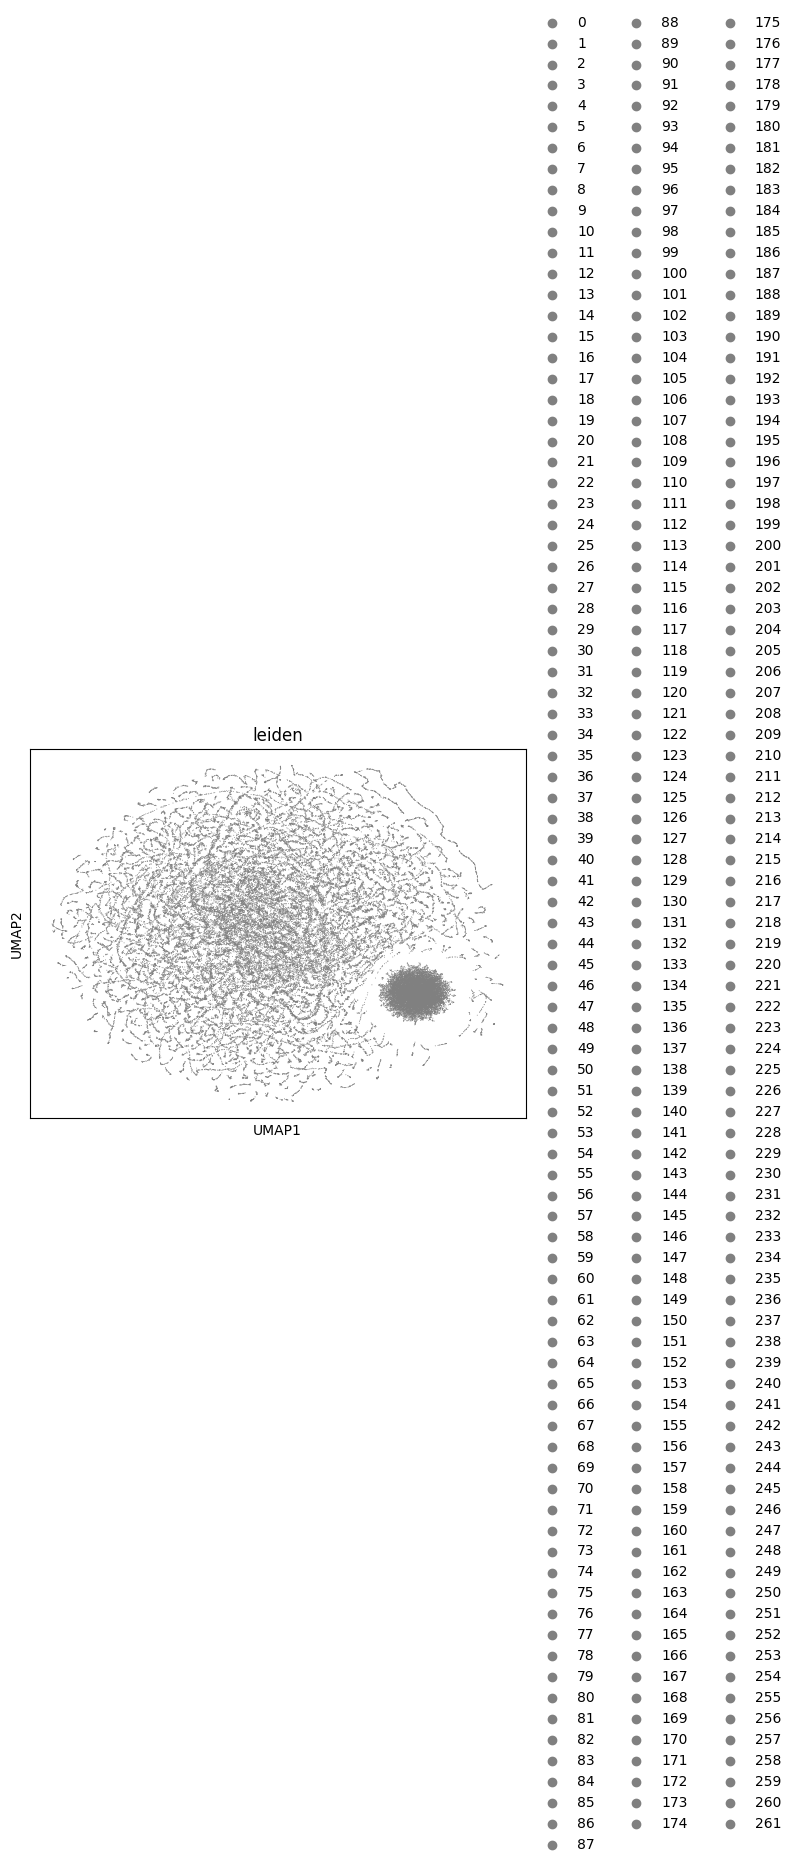

In [59]:
sc.pl.umap(adata, color=['leiden'])